# Chapter 7

## Fourier Transform


#### Fast Fourier Transform using Python

Text(0.5, 1.0, 'After')

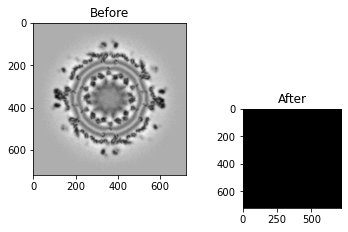

In [4]:
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L') 
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Converting the d to floating type and saving it 
# as fft1_output.raw in Figures folder.
d.astype('float').tofile('../Figures/fft1_output.raw')
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(d, cmap='gray')
ax.set_title('After')

#### Ideal Lowpass Filter

Text(0.5, 1.0, 'After')

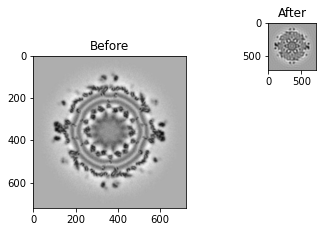

In [5]:
import cv2
import numpy, math
import scipy.fftpack as fftim   
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c) 

# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]  
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 20.0 # cut-off radius

# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to eliminate 
        # high frequency.
        if r > d_0:
            H[i,j] = 0.0
# Converting H to an image.
H =  Image.fromarray(H) 
# Performing the convolution.
con = d * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving e as ilowpass_output.png in
# Figures folder .
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(4, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Butterworth Lowpass Filter

Text(0.5, 1.0, 'After')

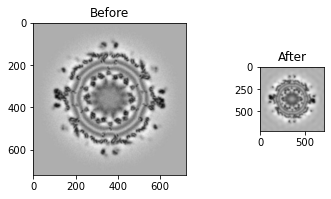

In [29]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
 # Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 11.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1

# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t1)

# Converting H to an image
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving e.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(3, 2, 4)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Gaussian Lowpass Filter

Text(0.5, 1.0, 'After')

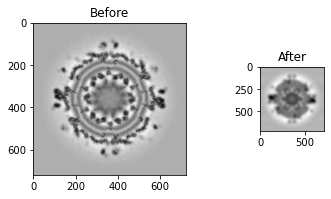

In [28]:
import numpy, math  
import cv2
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2  
center2 = N/2
d_0 = 5.0 # cut-off radius
t1 = 2*d_0    
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from 
        # origin is computed
        r = math.sqrt(r1) 
        # using cut-off radius to 
        # eliminate high frequency 
        if r > d_0:
            H[i,j] = math.exp(-r**2/t1**2)
            
# Converting H to an image.
H =  Image.fromarray(H)    
# Performing the convolution.
con = d * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving the image as glowpass_output.png in
# Figures folder .
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(3, 2, 4)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Ideal Highpass Filter

Text(0.5, 1.0, 'After')

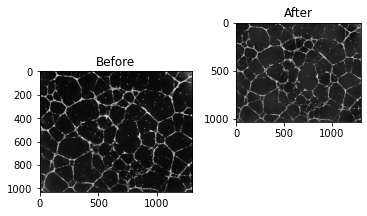

In [27]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale
a = Image.open('../Figures/endothelium.png').convert('L')
# Performing FFT.
b = fftim.fft2(a)
# shifting the Fourier frequency image
c = fftim.fftshift(b)

# intializing variables for convolution function
M = c.shape[0]
N = c.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 =4.0 # cut-off radius

# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
		# origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
con = c * H
# Computing the magnitude of the inverse FFT.
d = abs(fftim.ifft2(con))
# Saving the image as ihighpass_output.png in
# Figures folder.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(d, cmap='gray')
ax.set_title('After')

#### Butterworth Highpass Filter

Text(0.5, 1.0, 'After')

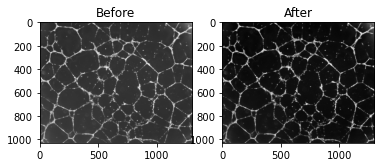

In [26]:
import cv2
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image.
a = cv2.imread('../Figures/endothelium.png')
# Converting the image to grayscale.
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing FFT.
c = fftim.fft2(b) 
# Shifting the Fourier frequency image.    
d = fftim.fftshift(c) 
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 600.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1    

# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:   
            H[i,j] = 1/(1 + (r/d_0)**t2) 

# Converting H to an image.
H = Image.fromarray(H) 	
# performing the convolution 
con = d * H 
# computing the magnitude of the inverse FFT
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')

#### Gaussian Highpass Filter

Text(0.5, 1.0, 'After')

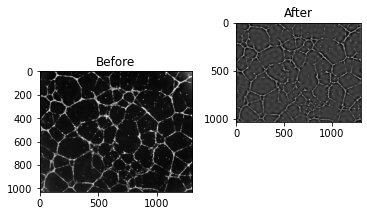

In [23]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
a = Image.open('../Figures/endothelium.png').convert('L') 
# Performing FFT.
b = fftim.fft2(a) 
# Shifting the Fourier frequency image. 
c = fftim.fftshift(b) 

# Intializing variables for convolution function.
M = c.shape[0] 
N = c.shape[1]
# H is defined and values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2   
center2 = N/2
d_0 = 20.0 # cut-off radius
t1 = 2*d_0

# Defining the convolution function for GHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1 - math.exp(-r**2/t1**2)

# Converting H to an image.
H = Image.fromarray(H) 
# Performing the convolution.
con = c * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving the image as ghighpass_output.png in
# Figures folder.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Bandpass Filter

Text(0.5, 1.0, 'After')

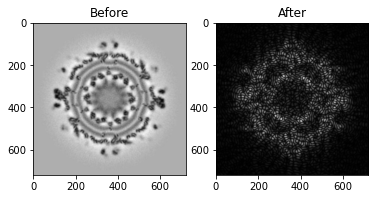

In [21]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
		# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving the image as ibandpass_output.png.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')